In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import time


## Get image counts

In [29]:
import os

path = "data/train"
dirs = os.listdir(path)

for folder in dirs:
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        num_files = len(os.listdir(folder_path))
        print(f"Number of images in {folder}: {num_files}")


Number of images in Closed: 726
Number of images in no_yawn: 725
Number of images in Open: 726
Number of images in yawn: 723


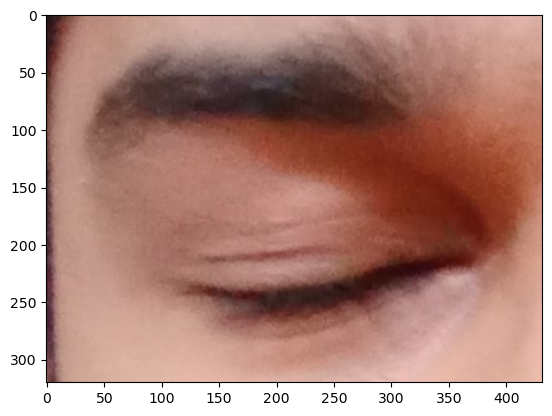

In [30]:
random_img = "data/train/Closed/"+ str(np.random.randint(0,700)) +".jpg"
plt.imshow(plt.imread(random_img))
plt.show()

In [31]:
subdir_path = 'data/train/Closed/'

files = os.listdir(subdir_path)
for file in files:
    if file.startswith('_'):
        old_path = os.path.join(subdir_path, file)
        new_path = os.path.join(subdir_path, file[1:])
        os.rename(old_path, new_path)

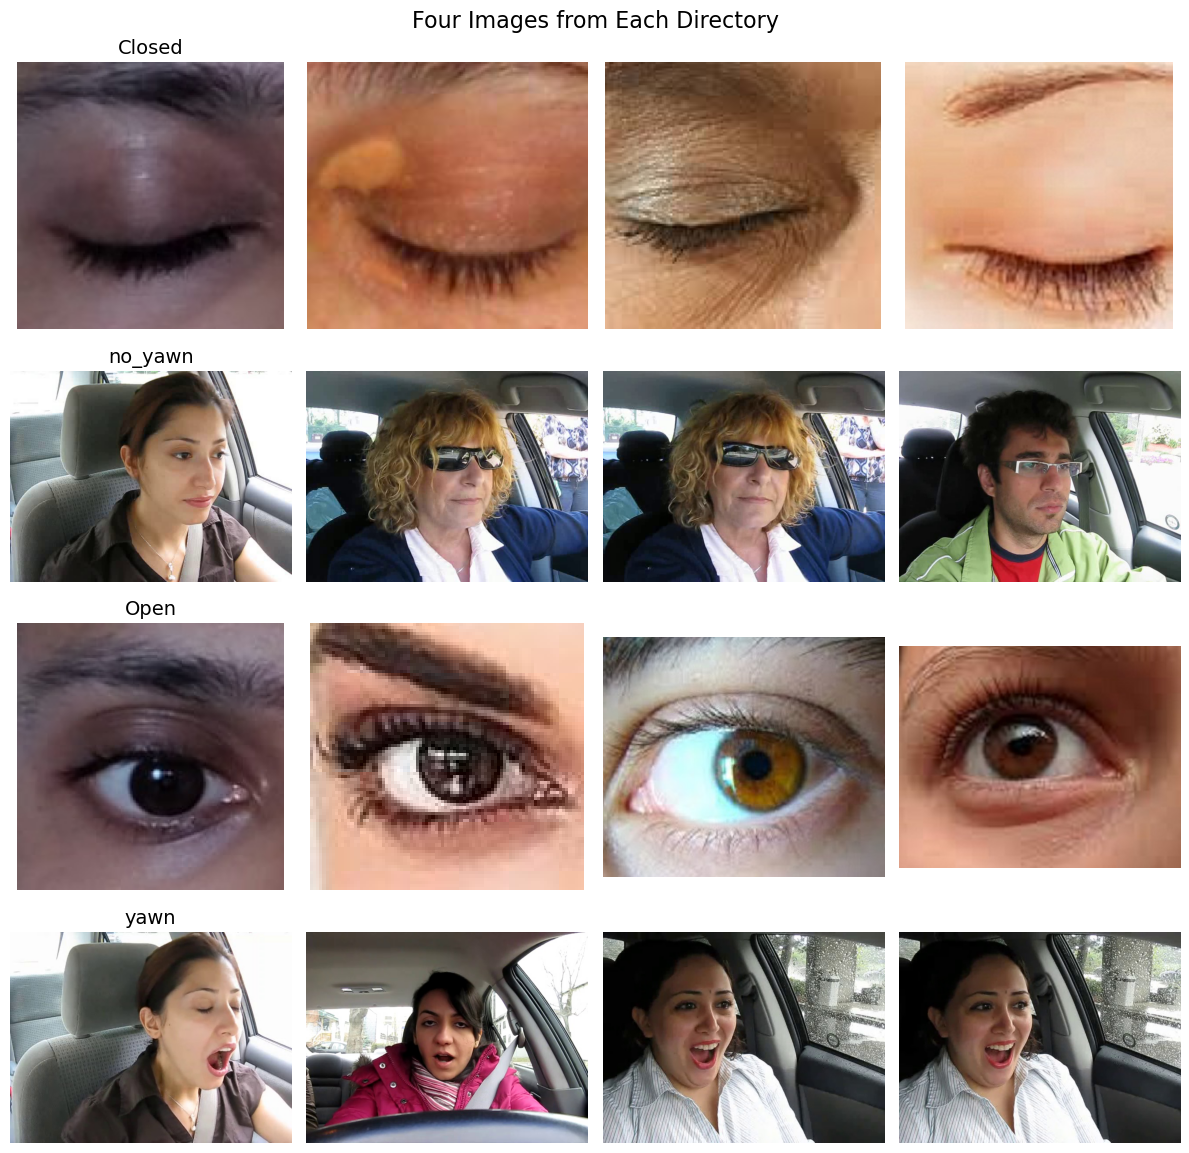

In [32]:
path = "data/train"
dirs = os.listdir(path)

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
fig.suptitle('Four Images from Each Directory', fontsize=16)

for i, folder in enumerate(dirs):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        axs[i, 0].set_title(folder, fontsize=14)
        for j, file in enumerate(os.listdir(folder_path)[:4]):
            file_path = os.path.join(folder_path, file)
            img = Image.open(file_path)
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            
plt.tight_layout()
plt.show()

Random Files shape

In [33]:


path = "data/train"
dirs = ["Closed", "no_yawn", "Open", "yawn"]

for folder in dirs:
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        if len(files) > 0:
            file_name = np.random.choice(files)
            file_path = os.path.join(folder_path, file_name)
            img = Image.open(file_path)
            print(f"{folder} file shape: {img.size}")

Closed file shape: (365, 300)
no_yawn file shape: (640, 480)
Open file shape: (473, 473)
yawn file shape: (640, 480)


The files in each directory are of different shapes

## Backgound removal

The yawn and no-yawn images have backgound. so remove the backgorund

'/haar/'

In [36]:

path = "data/train"
dirs = ["no_yawn", "yawn"]

# Load Haar Cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Loop through the yawn and no-yawn directories
for folder in dirs:
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            # Load image
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            
            # Convert to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Detect face using Haar Cascade classifier
            faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

            # If face is detected, crop and resize the image
            if len(faces) > 0:
                # Get the first face detected
                (x, y, w, h) = faces[0]
                
                # Crop the face
                face = img[y:y+h, x:x+w]
                
                # Resize the face to 145x145
                resized_face = cv2.resize(face, (145, 145))
                
                # Save the resized face to a file
                new_filename = os.path.splitext(filename)[0] + "_cropped.jpg"
                new_filepath = os.path.join(folder_path, new_filename)
                cv2.imwrite(new_filepath, resized_face)
                
                print(f"Processed {filename} and saved as {new_filename}")
            else:
                print(f"No face detected in {filename}")


0
1
0
1


In [39]:
np.array(yawn_no_yawn).shape

C:\Users\adity\AppData\Local\Temp\ipykernel_8892\2410233257.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(yawn_no_yawn).shape


(471, 2)